# Installation

In [1]:
# Import all the required packages.

import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# os.listdir()

In [3]:
path1 =  'EVCMS_CS_data.xlsx'
path2 =   'HEVCMS_CS_Data.xlsx'

# Data Preprocessing

In [4]:
evcms_df = pd.read_excel(path1)

In [5]:
evcms_df.columns

Index(['Transaction', 'Preferred Time', 'Duration', 'Power', 'Peak Status',
       'Availablity Status', 'Cost Mult', 'Original Cost',
       'Shifted Peak Status', 'Optimized Cost', 'Booked Cost', 'Shifted Time',
       'Charging Station', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [6]:
evcms_df = evcms_df.drop(columns = [ 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'])

In [7]:
evcms_df['Preferred Time'] = ["{:02d}.{:02d}".format(i.hour, i.minute) for i in evcms_df['Preferred Time']]
evcms_df['Shifted Time'] = ["{:02d}.{:02d}".format(i.hour, i.minute) for i in evcms_df['Shifted Time']]

In [8]:
hevcms_df = pd.read_excel(path2)
hevcms_df.columns

Index(['Transaction', 'Preferred Time', 'Duration', 'Power', 'Peak Status',
       'Availablity Status', 'Cost Mult', 'Original Cost',
       'Shifted Peak Status', 'Optimized Cost', 'Booked Cost', 'Shifted Time',
       'Charging Station', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [9]:
hevcms_df = hevcms_df.drop(columns = [ 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'])

In [10]:
hevcms_df['Preferred Time'] = ["{:02d}.{:02d}".format(i.hour, i.minute) for i in hevcms_df['Preferred Time']]
hevcms_df['Shifted Time'] = ["{:02d}.{:02d}".format(i.hour, i.minute) for i in hevcms_df['Shifted Time']]

In [11]:
# evcms_df.to_csv('EVCMS_CS_data.csv')
# hevcms_df.to_csv('HEVCMS_CS_Data.csv')

# Data Preparation


In [12]:
# Define the ranges
ranges = [
        (0,0.59), (1.0, 1.59), (2.0, 2.59), (3.0, 3.59), (4.0, 4.59), (5.0,5.59), (6.0, 6.59), (7.0, 7.59), (8.0, 8.59), 
        (9.0, 9.59), (10,10.59), (11.0, 11.59), (12.0, 12.59), (13.0, 13.59), (14.0, 14.59), (15.0,15.59), (16.0, 16.59),
        (17.0, 17.59), (18.0, 18.59), (19.0, 19.59), (20.0,20.59), (21.0, 21.59), (22.0, 22.59), (23.0, 23.59),
    ]

def count_values_in_ranges(ranges, values):
    """
        This function takes time ranges and a time value column as input, 
        and it converts them into a dictionary format that counts the occurrence of each value.
    """

    # Initialize an empty dictionary to store the counts
    count_dict = {}
        
    # Initialize counts for each range to zero
    for start, end in ranges:
        count_dict[start] = 0
    
    # Iterate through the values and count them in the appropriate range
    for value in values:
        for start, end in ranges:
            if start <= value <= end:
                count_dict[start] += 1
    
    return count_dict

def sum_values_in_ranges(ranges, time, values):
    """
        This function takes time ranges, a time value, and a value column as input. 
        It converts them into a dictionary format, where the values are summed 
        if their associated time range falls within the specified time ranges.
    """

    
    # Initialize an empty dictionary to store the counts
    sum_dict = {}
        
    # Initialize counts for each range to zero
    for start, end in ranges:
        sum_dict[start] = 0
    
    # Iterate through the values and count them in the appropriate range
    for time, value in zip(time, values):
        for start, end in ranges:
            if start <= time <= end:
                sum_dict[start] += value
    
    return sum_dict

# Graph

In [13]:
cs1_evcms_df = evcms_df[evcms_df[ 'Charging Station'] == 'CS1']
cs2_evcms_df = evcms_df[evcms_df[ 'Charging Station'] == 'CS2']
cs1_hevcms_df = hevcms_df[hevcms_df[ 'Charging Station'] == 'CS1']
cs2_hevcms_df = hevcms_df[hevcms_df[ 'Charging Station'] == 'CS2']

In [14]:
cs1_evcms_df.shape, cs2_evcms_df.shape,cs1_hevcms_df.shape, cs2_hevcms_df.shape

((338, 13), (162, 13), (241, 13), (259, 13))

In [15]:
# Convert Preferred Time values to float.
# Sum the available slots in the specified range and store the results in 'dict1'.

cs1_evcms_df_preferred_time = list(cs1_evcms_df['Preferred Time'])
cs1_evcms_df_preferred_time = [float(i) for i in cs1_evcms_df_preferred_time]
cs1_evcms_df_avl = list(cs1_evcms_df['Availablity Status'])
# Charging demand prior to load balancing.
cs1_evcms_dict = sum_values_in_ranges(ranges, cs1_evcms_df_preferred_time, cs1_evcms_df_avl)


cs2_evcms_df_preferred_time = list(cs2_evcms_df['Preferred Time'])
cs2_evcms_df_preferred_time = [float(i) for i in cs2_evcms_df_preferred_time]
cs2_evcms_df_avl = list(cs2_evcms_df['Availablity Status'])

# Charging demand prior to load balancing.
cs2_evcms_dict = sum_values_in_ranges(ranges, cs2_evcms_df_preferred_time, cs2_evcms_df_avl)


cs1_hevcms_df_preferred_time = list(cs1_hevcms_df['Preferred Time'])
cs1_hevcms_df_preferred_time = [float(i) for i in cs1_hevcms_df_preferred_time]
cs1_hevcms_df_avl = list(cs1_hevcms_df['Availablity Status'])

# Charging demand prior to load balancing.
cs1_hevcms_dict = sum_values_in_ranges(ranges, cs1_hevcms_df_preferred_time, cs1_hevcms_df_avl)


cs2_hevcms_df_preferred_time = list(cs2_hevcms_df['Preferred Time'])
cs2_hevcms_df_preferred_time = [float(i) for i in cs2_hevcms_df_preferred_time]
cs2_hevcms_df_avl = list(cs2_hevcms_df['Availablity Status'])

# Charging demand prior to load balancing.
cs2_hevcms_dict = sum_values_in_ranges(ranges, cs2_hevcms_df_preferred_time, cs2_hevcms_df_avl)


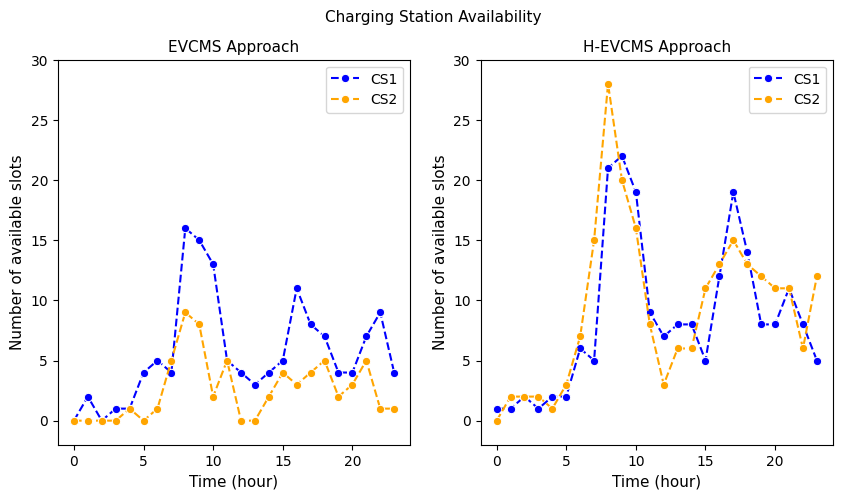

In [18]:
#plots
plt.figure(figsize=(10, 5))
plt.suptitle("Charging Station Availability", fontsize = 11)

plt.subplot(1, 2, 1)
plt.title("EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylim(-2, 30)
plt.ylabel("Number of available slots", fontsize = 11)
sns.lineplot(x=list(cs1_evcms_dict.keys()), 
             y = list(cs1_evcms_dict.values())
             ,color = "blue"#'#87CEEB'
             , linestyle="--", marker='o',label ='CS1')
sns.lineplot(x=list(cs2_evcms_dict.keys()),
             y = list(cs2_evcms_dict.values())
             ,color = "orange"#'#98FB98'
             , linestyle="--", marker='o',label ='CS2')


plt.subplot(1, 2, 2)
plt.title("H-EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylabel("Number of available slots", fontsize = 11)
plt.ylim(-2, 30)
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys()), 
                        y = list(cs1_hevcms_dict.values()), 
                        linestyle="--", 
                        marker='o',
                        color ="blue"#'#87CEEB', 
                        ,label = "CS1")

lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys()), 
                        y = list(cs2_hevcms_dict.values()),
                        linestyle="--", 
                        marker='o',
                        color ="orange"#'#98FB98',
                        ,label = "CS2")


In [19]:
# Convert Preferred Time values to float.
# Count the number of EVs within the specified range and store the results in 'dict1'.

cs1_evcms_df_preferred_time = list(cs1_evcms_df['Preferred Time'])
cs1_evcms_df_preferred_time = [float(i) for i in cs1_evcms_df_preferred_time]

# Charging demand prior to load balancing.
cs1_evcms_dict = count_values_in_ranges(ranges, cs1_evcms_df_preferred_time)


cs2_evcms_df_preferred_time = list(cs2_evcms_df['Preferred Time'])
cs2_evcms_df_preferred_time = [float(i) for i in cs2_evcms_df_preferred_time]

# Charging demand prior to load balancing.
cs2_evcms_dict = count_values_in_ranges(ranges, cs2_evcms_df_preferred_time)


cs1_hevcms_df_preferred_time = list(cs1_hevcms_df['Preferred Time'])
cs1_hevcms_df_preferred_time = [float(i) for i in cs1_hevcms_df_preferred_time]

# Charging demand prior to load balancing.
cs1_hevcms_dict = count_values_in_ranges(ranges, cs1_hevcms_df_preferred_time)




cs2_hevcms_df_preferred_time = list(cs2_hevcms_df['Preferred Time'])
cs2_hevcms_df_preferred_time = [float(i) for i in cs2_hevcms_df_preferred_time]

# Charging demand prior to load balancing.
cs2_hevcms_dict = count_values_in_ranges(ranges, cs2_hevcms_df_preferred_time)


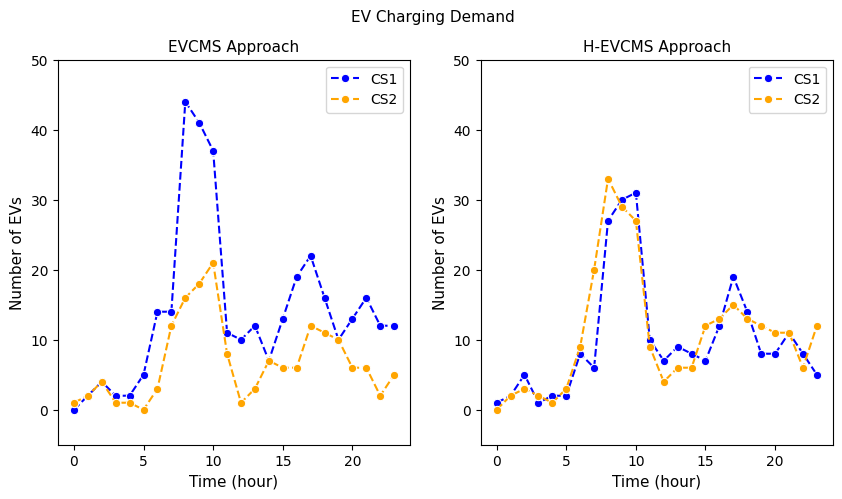

In [20]:
#plots
plt.figure(figsize=(10, 5))
plt.suptitle("EV Charging Demand", fontsize = 11)

plt.subplot(1, 2, 1)
plt.title("EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylim(-5, 50)
plt.ylabel("Number of EVs", fontsize = 11)
sns.lineplot(x=list(cs1_evcms_dict.keys()), 
             y = list(cs1_evcms_dict.values())
             ,color = "blue"#'#87CEEB'
             , linestyle="--", marker='o',label ='CS1')
sns.lineplot(x=list(cs2_evcms_dict.keys()),
             y = list(cs2_evcms_dict.values())
             ,color = "orange"#'#98FB98'
             , linestyle="--", marker='o',label ='CS2')


plt.subplot(1, 2, 2)
plt.title("H-EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylabel("Number of EVs", fontsize = 11)
plt.ylim(-5, 50)
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys()), 
                        y = list(cs1_hevcms_dict.values()), 
                        linestyle="--", 
                        marker='o',
                        color ="blue"#'#87CEEB', 
                        ,label = "CS1")

lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys()), 
                        y = list(cs2_hevcms_dict.values()),
                        linestyle="--", 
                        marker='o',
                        color ="orange"#'#98FB98',
                        ,label = "CS2")


In [21]:
# Convert Preferred Time values to float.
# Sum the power consumed in the specified range and store the results in 'dict1'.

cs1_evcms_df_preferred_time = list(cs1_evcms_df['Preferred Time'])
cs1_evcms_df_preferred_time = [float(i) for i in cs1_evcms_df_preferred_time]
cs1_evcms_df_power = list(cs1_evcms_df['Power'])
# Charging demand prior to load balancing.
cs1_evcms_dict = sum_values_in_ranges(ranges, cs1_evcms_df_preferred_time, cs1_evcms_df_power)


cs2_evcms_df_preferred_time = list(cs2_evcms_df['Preferred Time'])
cs2_evcms_df_preferred_time = [float(i) for i in cs2_evcms_df_preferred_time]
cs2_evcms_df_power = list(cs2_evcms_df['Power'])

# Charging demand prior to load balancing.
cs2_evcms_dict = sum_values_in_ranges(ranges, cs2_evcms_df_preferred_time, cs2_evcms_df_power)


cs1_hevcms_df_preferred_time = list(cs1_hevcms_df['Preferred Time'])
cs1_hevcms_df_preferred_time = [float(i) for i in cs1_hevcms_df_preferred_time]
cs1_hevcms_df_power = list(cs1_hevcms_df['Power'])

# Charging demand prior to load balancing.
cs1_hevcms_dict = sum_values_in_ranges(ranges, cs1_hevcms_df_preferred_time, cs1_hevcms_df_power)


cs2_hevcms_df_preferred_time = list(cs2_hevcms_df['Preferred Time'])
cs2_hevcms_df_preferred_time = [float(i) for i in cs2_hevcms_df_preferred_time]
cs2_hevcms_df_power = list(cs2_hevcms_df['Power'])

# Charging demand prior to load balancing.
cs2_hevcms_dict = sum_values_in_ranges(ranges, cs2_hevcms_df_preferred_time, cs2_evcms_df_power)


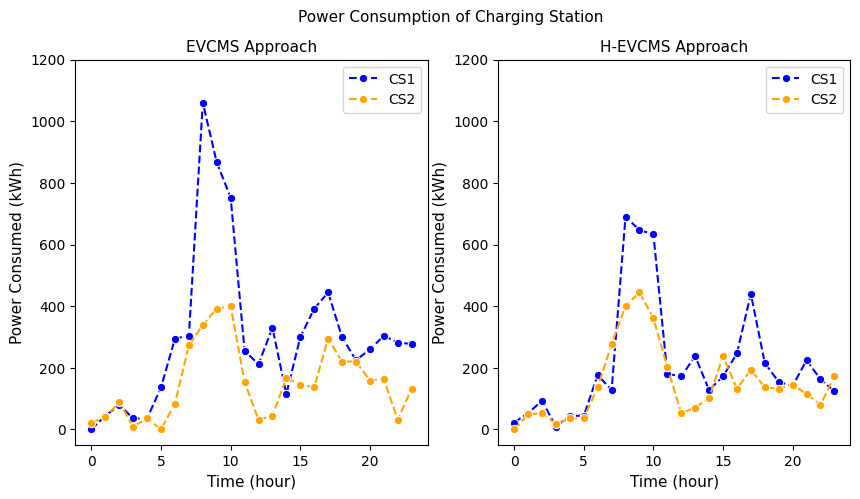

In [22]:
#plots
plt.figure(figsize=(10, 5))
plt.suptitle("Power Consumption of Charging Station", fontsize = 11)

plt.subplot(1, 2, 1)
plt.title("EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylim(-50, 1200)
plt.ylabel("Power Consumed (kWh)", fontsize = 11)
sns.lineplot(x=list(cs1_evcms_dict.keys()), 
             y = list(cs1_evcms_dict.values())
             ,color = "blue"#'#87CEEB'
             , linestyle="--", marker='o',label ='CS1')
sns.lineplot(x=list(cs2_evcms_dict.keys()),
             y = list(cs2_evcms_dict.values())
             ,color = "orange"#'#98FB98'
             , linestyle="--", marker='o',label ='CS2')


plt.subplot(1, 2, 2)
plt.title("H-EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylabel("Power Consumed (kWh)", fontsize = 11)
plt.ylim(-50, 1200)
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys()), 
                        y = list(cs1_hevcms_dict.values()), 
                        linestyle="--", 
                        marker='o',
                        color ="blue"#'#87CEEB', 
                        ,label = "CS1")

lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys()), 
                        y = list(cs2_hevcms_dict.values()),
                        linestyle="--", 
                        marker='o',
                        color ="orange"#'#98FB98',
                        ,label = "CS2")


In [23]:
# Convert Preferred Time values to float.
# Sum the power consumed in the specified range and store the results in 'dict1'.

cs1_evcms_df_preferred_time = list(cs1_evcms_df['Preferred Time'])
cs1_evcms_df_preferred_time = [float(i) for i in cs1_evcms_df_preferred_time]
cs1_evcms_df_duration = list(cs1_evcms_df['Duration'])
# Charging demand prior to load balancing.
cs1_evcms_dict = sum_values_in_ranges(ranges, cs1_evcms_df_preferred_time, cs1_evcms_df_duration)


cs2_evcms_df_preferred_time = list(cs2_evcms_df['Preferred Time'])
cs2_evcms_df_preferred_time = [float(i) for i in cs2_evcms_df_preferred_time]
cs2_evcms_df_duration = list(cs2_evcms_df['Duration'])

# Charging demand prior to load balancing.
cs2_evcms_dict = sum_values_in_ranges(ranges, cs2_evcms_df_preferred_time, cs2_evcms_df_duration)


cs1_hevcms_df_preferred_time = list(cs1_hevcms_df['Preferred Time'])
cs1_hevcms_df_preferred_time = [float(i) for i in cs1_hevcms_df_preferred_time]
cs1_hevcms_df_duration = list(cs1_hevcms_df['Duration'])

# Charging demand prior to load balancing.
cs1_hevcms_dict = sum_values_in_ranges(ranges, cs1_hevcms_df_preferred_time, cs1_hevcms_df_duration)


cs2_hevcms_df_preferred_time = list(cs2_hevcms_df['Preferred Time'])
cs2_hevcms_df_preferred_time = [float(i) for i in cs2_hevcms_df_preferred_time]
cs2_hevcms_df_duration = list(cs2_hevcms_df['Duration'])

# Charging demand prior to load balancing.
cs2_hevcms_dict = sum_values_in_ranges(ranges, cs2_hevcms_df_preferred_time, cs2_hevcms_df_duration)


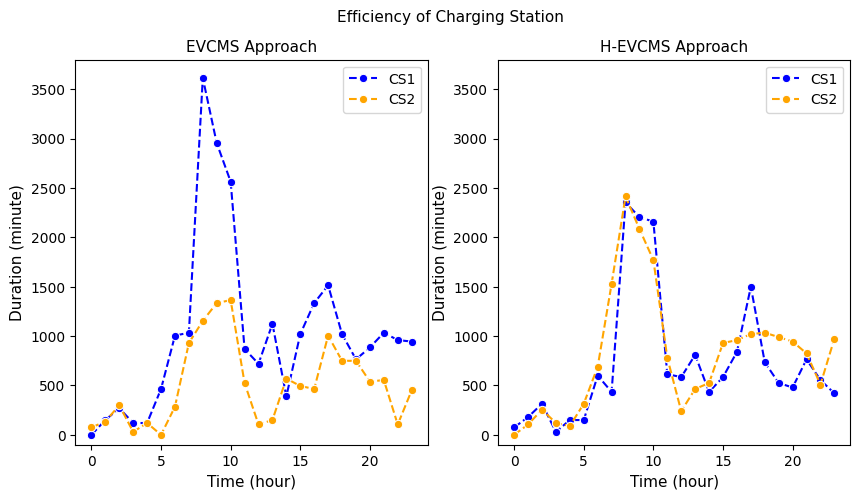

In [24]:
#plots
plt.figure(figsize=(10, 5))
plt.suptitle("Efficiency of Charging Station", fontsize = 11)

plt.subplot(1, 2, 1)
plt.title("EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylim(-100, 3800)
plt.ylabel("Duration (minute)", fontsize = 11)
sns.lineplot(x=list(cs1_evcms_dict.keys()), 
             y = list(cs1_evcms_dict.values())
             ,color = "blue"#'#87CEEB'
             , linestyle="--", marker='o',label ='CS1')
sns.lineplot(x=list(cs2_evcms_dict.keys()),
             y = list(cs2_evcms_dict.values())
             ,color = "orange"#'#98FB98'
             , linestyle="--", marker='o',label ='CS2')


plt.subplot(1, 2, 2)
plt.title("H-EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylabel("Duration (minute)", fontsize = 11)
plt.ylim(-100, 3800)
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys()), 
                        y = list(cs1_hevcms_dict.values()), 
                        linestyle="--", 
                        marker='o',
                        color ="blue"#'#87CEEB', 
                        ,label = "CS1")

lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys()), 
                        y = list(cs2_hevcms_dict.values()),
                        linestyle="--", 
                        marker='o',
                        color ="orange"#'#98FB98',
                        ,label = "CS2")


In [25]:
# Convert Preferred Time values to float.
# Sum the power consumed in the specified range and store the results in 'dict1'.

cs1_evcms_df_preferred_time = list(cs1_evcms_df['Preferred Time'])
cs1_evcms_df_preferred_time = [float(i) for i in cs1_evcms_df_preferred_time]
cs1_evcms_df_peak = list(cs1_evcms_df['Peak Status'])
# Charging demand prior to load balancing.
cs1_evcms_dict = sum_values_in_ranges(ranges, cs1_evcms_df_preferred_time, cs1_evcms_df_peak)


cs2_evcms_df_preferred_time = list(cs2_evcms_df['Preferred Time'])
cs2_evcms_df_preferred_time = [float(i) for i in cs2_evcms_df_preferred_time]
cs2_evcms_df_peak = list(cs2_evcms_df['Peak Status'])

# Charging demand prior to load balancing.
cs2_evcms_dict = sum_values_in_ranges(ranges, cs2_evcms_df_preferred_time, cs2_evcms_df_peak)


cs1_hevcms_df_preferred_time = list(cs1_hevcms_df['Preferred Time'])
cs1_hevcms_df_preferred_time = [float(i) for i in cs1_hevcms_df_preferred_time]
cs1_hevcms_df_peak = list(cs1_hevcms_df['Peak Status'])

# Charging demand prior to load balancing.
cs1_hevcms_dict = sum_values_in_ranges(ranges, cs1_hevcms_df_preferred_time, cs1_hevcms_df_peak)


cs2_hevcms_df_preferred_time = list(cs2_hevcms_df['Preferred Time'])
cs2_hevcms_df_preferred_time = [float(i) for i in cs2_hevcms_df_preferred_time]
cs2_hevcms_df_peak = list(cs2_hevcms_df['Peak Status'])

# Charging demand prior to load balancing.
cs2_hevcms_dict = sum_values_in_ranges(ranges, cs2_hevcms_df_preferred_time, cs2_hevcms_df_peak
                                      )


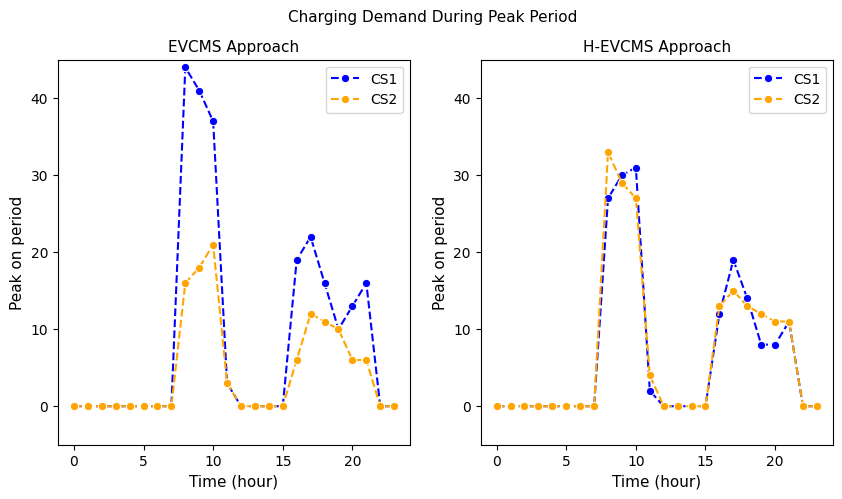

In [26]:
#plots
plt.figure(figsize=(10, 5))
plt.suptitle("Charging Demand During Peak Period", fontsize = 11)

plt.subplot(1, 2, 1)
plt.title("EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylim(-5, 45)
plt.ylabel("Peak on period", fontsize = 11)
sns.lineplot(x=list(cs1_evcms_dict.keys()), 
             y = list(cs1_evcms_dict.values())
             ,color = "blue"#'#87CEEB'
             , linestyle="--", marker='o',label ='CS1')
sns.lineplot(x=list(cs2_evcms_dict.keys()),
             y = list(cs2_evcms_dict.values())
             ,color = "orange"#'#98FB98'
             , linestyle="--", marker='o',label ='CS2')


plt.subplot(1, 2, 2)
plt.title("H-EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylabel("Peak on period", fontsize = 11)
plt.ylim(-5, 45)
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys()), 
                        y = list(cs1_hevcms_dict.values()), 
                        linestyle="--", 
                        marker='o',
                        color ="blue"#'#87CEEB', 
                        ,label = "CS1")

lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys()), 
                        y = list(cs2_hevcms_dict.values()),
                        linestyle="--", 
                        marker='o',
                        color ="orange"#'#98FB98',
                        ,label = "CS2")


In [27]:
# Convert Preferred Time values to float.
# Count the number of EVs within the specified range and store the results in 'dict1'.

cs1_evcms_df_preferred_time = list(cs1_evcms_df['Preferred Time'])
cs1_evcms_df_preferred_time = [float(i) for i in cs1_evcms_df_preferred_time]

# Charging demand prior to load balancing.
cs1_evcms_dict = count_values_in_ranges(ranges, cs1_evcms_df_preferred_time)


cs2_evcms_df_preferred_time = list(cs2_evcms_df['Preferred Time'])
cs2_evcms_df_preferred_time = [float(i) for i in cs2_evcms_df_preferred_time]

# Charging demand prior to load balancing.
cs2_evcms_dict = count_values_in_ranges(ranges, cs2_evcms_df_preferred_time)


cs1_hevcms_df_preferred_time = list(cs1_hevcms_df['Preferred Time'])
cs1_hevcms_df_preferred_time = [float(i) for i in cs1_hevcms_df_preferred_time]

# Charging demand prior to load balancing.
cs1_hevcms_dict = count_values_in_ranges(ranges, cs1_hevcms_df_preferred_time)




cs2_hevcms_df_preferred_time = list(cs2_hevcms_df['Preferred Time'])
cs2_hevcms_df_preferred_time = [float(i) for i in cs2_hevcms_df_preferred_time]

# Charging demand prior to load balancing.
cs2_hevcms_dict = count_values_in_ranges(ranges, cs2_hevcms_df_preferred_time)


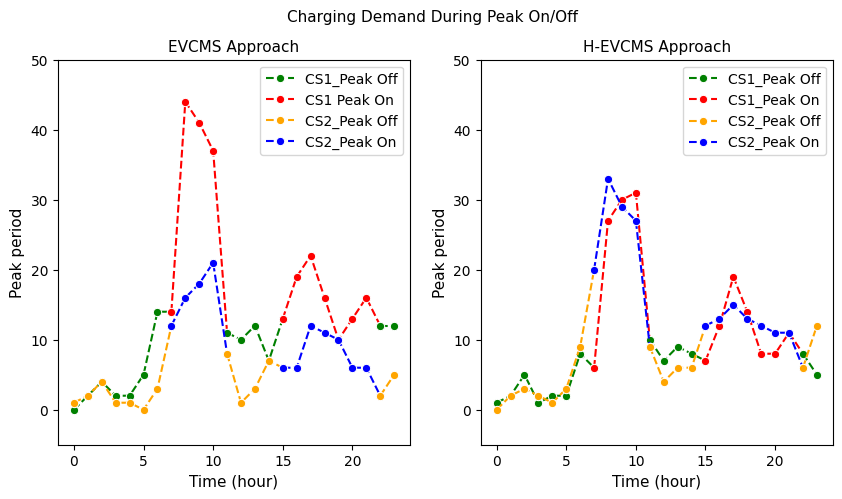

In [28]:
#plots
plt.figure(figsize=(10, 5))
plt.suptitle("Charging Demand During Peak On/Off", fontsize = 11)

plt.subplot(1, 2, 1)
plt.title("EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylim(-5, 50)
plt.ylabel("Peak period", fontsize = 11)
sns.lineplot(x=list(cs1_evcms_dict.keys())[:8], 
             y = list(cs1_evcms_dict.values())[:8]
             ,color = 'green'
             , linestyle="--", marker='o',label ='CS1_Peak Off')
sns.lineplot(x=list(cs1_evcms_dict.keys())[7:12], 
             y = list(cs1_evcms_dict.values())[7:12]
             ,color = "red"#'#87CEEB'
             , linestyle="--", marker='o',label ='CS1 Peak On')
sns.lineplot(x=list(cs1_evcms_dict.keys())[11:16], 
             y = list(cs1_evcms_dict.values())[11:16]
             ,color = 'green'
             , linestyle="--", marker='o')
sns.lineplot(x=list(cs1_evcms_dict.keys())[15:23], 
             y = list(cs1_evcms_dict.values())[15:23]
             ,color = "red"#'#87CEEB'
             , linestyle="--", marker='o')
sns.lineplot(x=list(cs1_evcms_dict.keys())[22:], 
             y = list(cs1_evcms_dict.values())[22:]
             ,color = 'green'
             , linestyle="--", marker='o')


sns.lineplot(x=list(cs2_evcms_dict.keys())[:8],
             y = list(cs2_evcms_dict.values())[:8]
             ,color = 'orange'
             , linestyle="--", marker='o',label ='CS2_Peak Off')
sns.lineplot(x=list(cs2_evcms_dict.keys())[7:12],
             y = list(cs2_evcms_dict.values())[7:12]
             ,color = "blue"#'#98FB98'
             , linestyle="--", marker='o',label ='CS2_Peak On')
sns.lineplot(x=list(cs2_evcms_dict.keys())[11:16],
             y = list(cs2_evcms_dict.values())[11:16]
             ,color = 'orange'
             , linestyle="--", marker='o')
sns.lineplot(x=list(cs2_evcms_dict.keys())[15:23],
             y = list(cs2_evcms_dict.values())[15:23]
             ,color = "blue"#'#98FB98'
             , linestyle="--", marker='o')
sns.lineplot(x=list(cs2_evcms_dict.keys())[22:],
             y = list(cs2_evcms_dict.values())[22:]
             ,color = 'orange'
             , linestyle="--", marker='o')


plt.subplot(1, 2, 2)
plt.title("H-EVCMS Approach", fontsize = 11)
plt.xlabel("Time (hour)", fontsize = 11)
plt.ylabel("Peak period", fontsize = 11)
plt.ylim(-5, 50)
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys())[:8], 
                        y = list(cs1_hevcms_dict.values())[:8], 
                        linestyle="--", 
                        marker='o',
                        color ='green'
                        ,label = "CS1_Peak Off")
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys())[7:12], 
                        y = list(cs1_hevcms_dict.values())[7:12], 
                        linestyle="--", 
                        marker='o',
                        color ="red"#'#87CEEB', 
                        ,label = "CS1_Peak On")
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys())[11:16], 
                        y = list(cs1_hevcms_dict.values())[11:16], 
                        linestyle="--", 
                        marker='o',
                        color ='green'
                        )
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys())[15:23], 
                        y = list(cs1_hevcms_dict.values())[15:23], 
                        linestyle="--", 
                        marker='o',
                        color ="red"#'#87CEEB', 
                        )
lineplot = sns.lineplot(x= list(cs1_hevcms_dict.keys())[22:], 
                        y = list(cs1_hevcms_dict.values())[22:], 
                        linestyle="--", 
                        marker='o',
                        color ='green'
                        )



lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys())[:8], 
                        y = list(cs2_hevcms_dict.values())[:8],
                        linestyle="--", 
                        marker='o',
                        color ='orange'
                        ,label = "CS2_Peak Off")
lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys())[7:12], 
                        y = list(cs2_hevcms_dict.values())[7:12],
                        linestyle="--", 
                        marker='o',
                        color ="blue"#'#98FB98',
                        ,label = "CS2_Peak On")
lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys())[11:16], 
                        y = list(cs2_hevcms_dict.values())[11:16],
                        linestyle="--", 
                        marker='o',
                        color ='orange'
                        )
lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys())[15:23], 
                        y = list(cs2_hevcms_dict.values())[15:23],
                        linestyle="--", 
                        marker='o',
                        color ="blue"#'#98FB98',
                        )
lineplot = sns.lineplot(x= list(cs2_hevcms_dict.keys())[22:], 
                        y = list(cs2_hevcms_dict.values())[22:],
                        linestyle="--", 
                        marker='o',
                        color ='orange'
                       )
